In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-movie-success-rate/movie_success_rate.csv


In [2]:
import numpy as np
import pandas as pd

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [5]:
import seaborn as sns 
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve

In [7]:
data = pd.read_csv("/kaggle/input/predict-movie-success-rate/movie_success_rate.csv")

In [9]:
data.shape

(839, 33)

In [10]:
data.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
0,1.0,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014.0,121.0,8.1,757074.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,2.0,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012.0,124.0,7.0,485820.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3.0,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016.0,117.0,7.3,157606.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,4.0,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016.0,108.0,7.2,60545.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016.0,123.0,6.2,393727.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [12]:
data.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Action,Adventure,Aniimation,...,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western,Success
count,838.000000,838.00000,838.000000,839.00000,8.390000e+02,839.000000,838.000000,838.000000,838.000000,838.000000,...,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.81432,1.932303e+05,84.564558,59.575179,0.330549,0.291169,0.053699,...,0.023866,0.005967,0.102625,0.143198,0.127685,0.017900,0.176611,0.011933,0.004773,0.177804
std,286.572065,3.17236,18.470922,0.87723,1.929838e+05,104.457845,16.952416,0.470692,0.454573,0.225558,...,0.152724,0.077059,0.303650,0.350484,0.333938,0.132666,0.381567,0.108650,0.068965,0.382576
min,1.000000,2006.00000,66.000000,1.90000,1.780000e+02,0.000000,11.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,238.250000,2010.00000,101.000000,6.30000,6.145500e+04,13.975000,47.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,475.500000,2013.00000,112.000000,6.90000,1.371170e+05,48.240000,60.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,729.750000,2015.00000,124.000000,7.50000,2.708650e+05,116.730000,72.000000,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1000.000000,2016.00000,187.000000,9.00000,1.791916e+06,936.630000,100.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839 entries, 0 to 838
Data columns (total 33 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                838 non-null    float64
 1   Title               838 non-null    object 
 2   Genre               838 non-null    object 
 3   Description         838 non-null    object 
 4   Director            838 non-null    object 
 5   Actors              838 non-null    object 
 6   Year                838 non-null    float64
 7   Runtime (Minutes)   838 non-null    float64
 8   Rating              839 non-null    float64
 9   Votes               839 non-null    float64
 10  Revenue (Millions)  839 non-null    float64
 11  Metascore           838 non-null    float64
 12  Action              838 non-null    float64
 13  Adventure           838 non-null    float64
 14  Aniimation          838 non-null    float64
 15  Biography           838 non-null    float64
 16  Comedy  

## DATA PROCESSING

In [16]:
data.isnull().sum()

Rank                  1
Title                 1
Genre                 1
Description           1
Director              1
Actors                1
Year                  1
Runtime (Minutes)     1
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             1
Action                1
Adventure             1
Aniimation            1
Biography             1
Comedy                1
Crime                 1
Drama                 1
Family                1
Fantasy               1
History               1
Horror                1
Music                 1
Musical               1
Mystery               1
Romance               1
Sci-Fi                1
Sport                 1
Thriller              1
War                   1
Western               1
Success               1
dtype: int64

In [17]:
df = data.dropna()

In [18]:
df.isnull().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
Action                0
Adventure             0
Aniimation            0
Biography             0
Comedy                0
Crime                 0
Drama                 0
Family                0
Fantasy               0
History               0
Horror                0
Music                 0
Musical               0
Mystery               0
Romance               0
Sci-Fi                0
Sport                 0
Thriller              0
War                   0
Western               0
Success               0
dtype: int64

<Axes: >

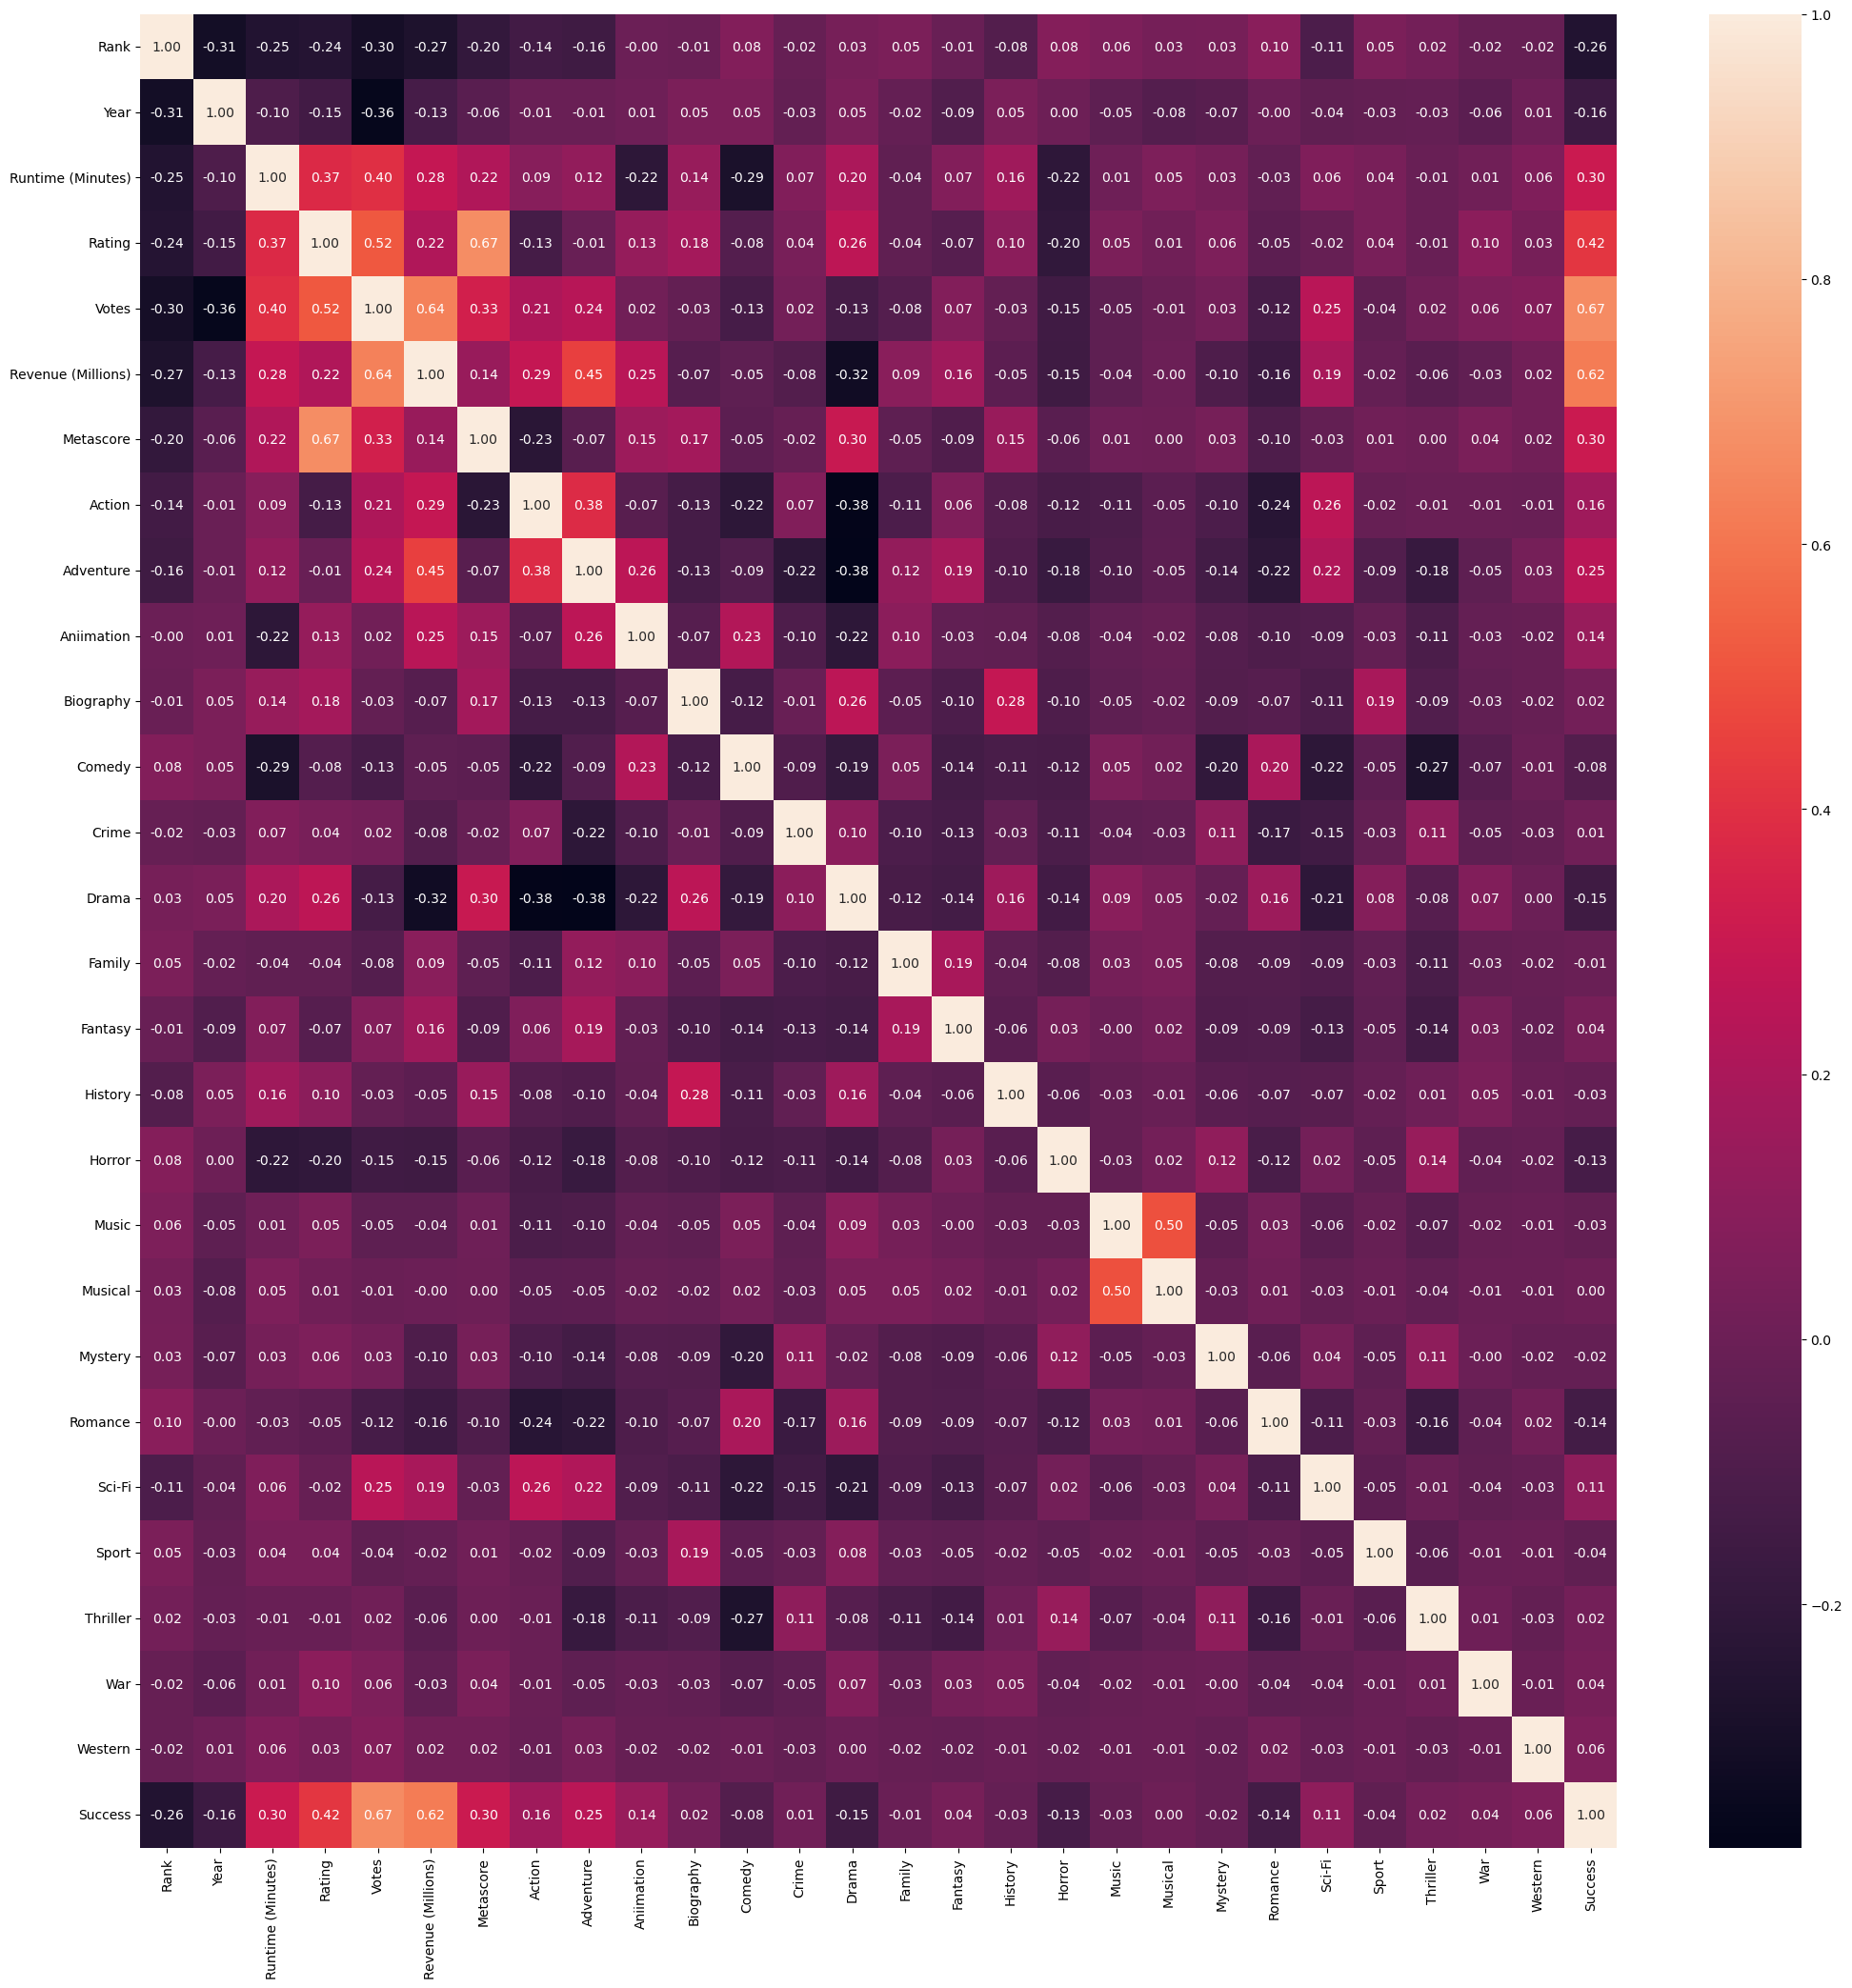

In [19]:
plt.subplots(figsize=(25,25))
sns.heatmap(df.corr(), annot = True, fmt='.2f')

In [20]:
x = df[df.columns[6:32]]
y = df["Success"]

In [21]:
x

,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore,Action,Adventure,Aniimation,Biography,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Sport,Thriller,War,Western
0,2014.0,121.0,8.1,757074.0,333.13,76.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2012.0,124.0,7.0,485820.0,126.46,65.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
2,2016.0,117.0,7.3,157606.0,138.12,62.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2016.0,108.0,7.2,60545.0,270.32,59.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2016.0,123.0,6.2,393727.0,325.02,40.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,2010.0,97.0,5.9,140900.0,60.13,37.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
834,2012.0,88.0,6.7,164088.0,54.72,48.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
835,2007.0,94.0,5.5,73152.0,17.54,46.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
836,2008.0,98.0,6.2,70699.0,58.01,50.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [22]:
y

0      1.0
1      1.0
2      0.0
3      0.0
4      0.0
      ... 
833    0.0
834    0.0
835    0.0
836    0.0
837    0.0
Name: Success, Length: 838, dtype: float64

In [23]:
x_train, x_test,y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=10)

In [24]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)

(838, 26)
(670, 26)
(168, 26)


In [25]:
scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [26]:
rf = RandomForestClassifier(n_estimators=60)

In [27]:
rf.fit(x_train, y_train)

y_pred_rf_test = rf.predict(x_test)

y_pred_rf_train = rf.predict(x_train)

In [28]:
testacc_rf = accuracy_score(y_pred_rf_test, y_test)

trainacc_rf = accuracy_score(y_pred_rf_train, y_train)

In [29]:
print("Training Accuracy of Random Forest: ", trainacc_rf)

print("Testing Accuracy of Random Forest: ", testacc_rf)

Training Accuracy of Random Forest:  1.0
Testing Accuracy of Random Forest:  1.0


<Axes: >

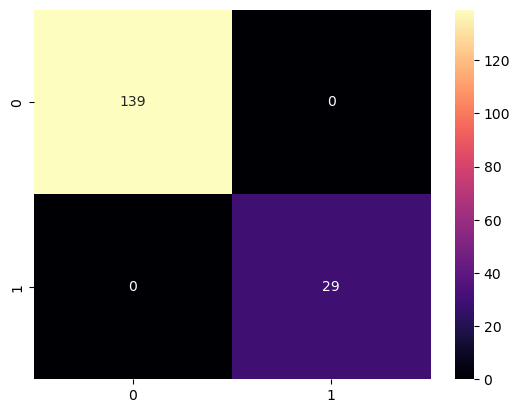

In [33]:
sns.heatmap(confusion_matrix(y_test,y_pred_rf_test), fmt = 'd',annot=True, cmap='magma')

In [31]:
print(classification_report(y_test,y_pred_rf_test))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00       139
         1.0       1.00      1.00      1.00        29

    accuracy                           1.00       168
   macro avg       1.00      1.00      1.00       168
weighted avg       1.00      1.00      1.00       168

